In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pathlib 
import cv2
from tqdm.auto import tqdm
%matplotlib inline

In [9]:
# Training Paths and Testing Paths
trainDataPaths = list(pathlib.Path("./dataset_dogs_vs_cats/train").rglob("*.jpg"))
print("Found {} images for training".format(len(trainDataPaths)))
testDataPaths = list(pathlib.Path("./dataset_dogs_vs_cats/test").rglob("*.jpg"))
print("Found {} images for testing".format(len(testDataPaths)))


Found 25000 images for training
Found 10 images for testing


In [10]:
trainDataPaths[0:10], testDataPaths[0:10]

([WindowsPath('dataset_dogs_vs_cats/train/cats/cat.0.jpg'),
  WindowsPath('dataset_dogs_vs_cats/train/cats/cat.1.jpg'),
  WindowsPath('dataset_dogs_vs_cats/train/cats/cat.10.jpg'),
  WindowsPath('dataset_dogs_vs_cats/train/cats/cat.100.jpg'),
  WindowsPath('dataset_dogs_vs_cats/train/cats/cat.1000.jpg'),
  WindowsPath('dataset_dogs_vs_cats/train/cats/cat.10000.jpg'),
  WindowsPath('dataset_dogs_vs_cats/train/cats/cat.10001.jpg'),
  WindowsPath('dataset_dogs_vs_cats/train/cats/cat.10002.jpg'),
  WindowsPath('dataset_dogs_vs_cats/train/cats/cat.10003.jpg'),
  WindowsPath('dataset_dogs_vs_cats/train/cats/cat.10004.jpg')],
 [WindowsPath('dataset_dogs_vs_cats/test/cats/10.jpg'),
  WindowsPath('dataset_dogs_vs_cats/test/cats/5.jpg'),
  WindowsPath('dataset_dogs_vs_cats/test/cats/6.jpg'),
  WindowsPath('dataset_dogs_vs_cats/test/cats/7.jpg'),
  WindowsPath('dataset_dogs_vs_cats/test/cats/8.jpg'),
  WindowsPath('dataset_dogs_vs_cats/test/cats/9.jpg'),
  WindowsPath('dataset_dogs_vs_cats/test/d

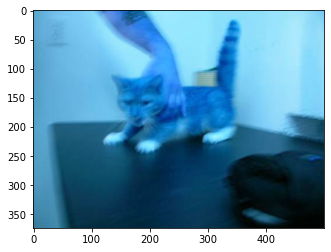

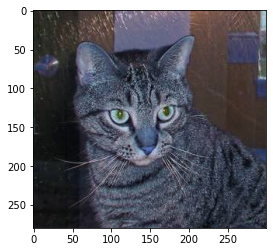

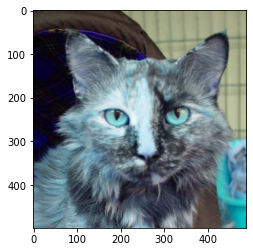

In [11]:
# Plot a few images - Training Data
imagesList = []
for i in range(3):
    imagePath = str(trainDataPaths[i])
    imagesList.append(cv2.imread(imagePath))

for index, image in enumerate(imagesList):
    plt.figure()
    plt.imshow(image)

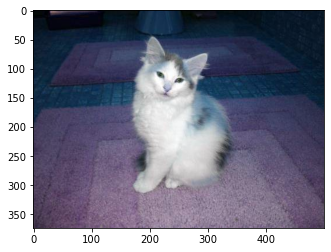

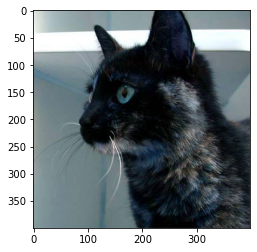

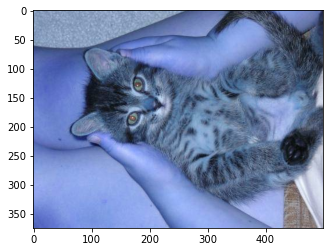

In [12]:
# Plot a few images - Testing Data
imagesList = []
for i in range(3):
    imagePath = str(testDataPaths[i])
    imagesList.append(cv2.imread(imagePath))

for index, image in enumerate(imagesList):
    plt.figure()
    plt.imshow(image)

In [13]:

# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# create directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)


In [14]:
for path in tqdm(trainDataPaths):
    if "cat" in str(path):
        copyfile(str(path), r"C:\Users\Swaminathan\Downloads\dogs-vs-cats\dataset_dogs_vs_cats\train\cats\{}".format(path.name))
    elif "dog" in str(path):
        copyfile(str(path), r"C:\Users\Swaminathan\Downloads\dogs-vs-cats\dataset_dogs_vs_cats\train\dogs\{}".format(path.name))

100%|██████████| 25000/25000 [03:13<00:00, 129.51it/s]


In [15]:
for path in tqdm(testDataPaths):
    if "cat" in str(path):
        copyfile(str(path), r"C:\Users\Swaminathan\Downloads\dogs-vs-cats\dataset_dogs_vs_cats\test\cats\{}".format(path.name))
    elif "dog" in str(path):
        copyfile(str(path), r"C:\Users\Swaminathan\Downloads\dogs-vs-cats\dataset_dogs_vs_cats\test\dogs\{}".format(path.name))

100%|██████████| 10/10 [00:00<00:00, 100.27it/s]


In [16]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, Dense, Input
from tensorflow.keras.optimizers import SGD

def define_model():
    model=tf.keras.Sequential([
    Input(shape=(200, 200, 3), name="image_input"),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
	MaxPool2D((2, 2)),
	Flatten(),
	Dense(128, activation='relu'),
	Dense(1, activation='sigmoid')
    ])
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [17]:
simplemodel = define_model()
simplemodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 320000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               40960128  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 40,961,153
Trainable params: 40,961,153
Non-trainable params: 0
_________________________________________________________________


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create data generator
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [19]:
# prepare iterators
train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
	class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
	class_mode='binary', batch_size=64, target_size=(200, 200))

Found 25000 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [20]:
25000 / 128

195.3125

In [21]:
# fit model
history = simplemodel.fit(train_it, steps_per_epoch=len(train_it), epochs=20, verbose=1) 

Epoch 1/20
 62/391 [===>..........................] - ETA: 7:25 - loss: 0.7074 - accuracy: 0.5350

KeyboardInterrupt: 

In [32]:
simplemodel.evaluate(train_it)

391/391 [==============================] - 144s 369ms/step - loss: 0.0798 - accuracy: 0.9860


[0.07982347905635834, 0.9860399961471558]

In [33]:
simplemodel.evaluate(test_it)

1/1 [==============================] - 0s 998us/step - loss: 0.4926 - accuracy: 0.8000


[0.49263548851013184, 0.800000011920929]

In [34]:
simplemodel.save("./simplemodel")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./simplemodel\assets
